In [4]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

import pydotplus
from sklearn import tree

from xgboost import XGBRegressor
%matplotlib inline

plt.style.use('ggplot')

In [5]:
train = pd.read_csv('/content/drive/MyDrive/인공지능 자연어처리 및 음성인식 음성합성 기술을 활용한 응용 SW 개발자 양성과정  (1)/1.머신러닝/workspace/bike.csv')
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [9]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [10]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [11]:
datetime = train['datetime']
datetime.head()

0   2011-01-01 00:00:00
1   2011-01-01 01:00:00
2   2011-01-01 02:00:00
3   2011-01-01 03:00:00
4   2011-01-01 04:00:00
Name: datetime, dtype: datetime64[ns]

In [12]:
train['year'] = datetime.dt.year
train['year'].head()

0    2011
1    2011
2    2011
3    2011
4    2011
Name: year, dtype: int64

In [13]:
train['month'] = datetime.dt.month
train['month'].head()

0    1
1    1
2    1
3    1
4    1
Name: month, dtype: int64

In [14]:
train['day'] = datetime.dt.day
train['day'].head()

0    1
1    1
2    1
3    1
4    1
Name: day, dtype: int64

In [15]:
train['hour'] = datetime.dt.hour
train['hour'].head()

0    0
1    1
2    2
3    3
4    4
Name: hour, dtype: int64

In [16]:
train['minute'] = datetime.dt.minute
train['minute'].head()

0    0
1    0
2    0
3    0
4    0
Name: minute, dtype: int64

In [17]:
train['second'] = datetime.dt.year
train['second'].head()

0    2011
1    2011
2    2011
3    2011
4    2011
Name: second, dtype: int64

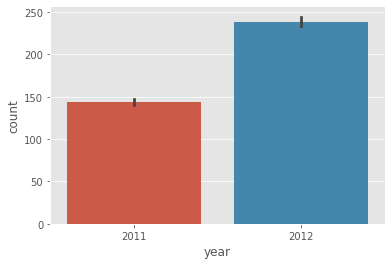

In [18]:
sns.barplot(data = train, x = 'year', y = 'count')

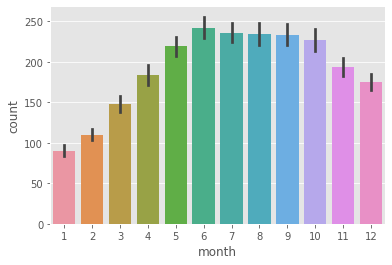

In [19]:
sns.barplot(data = train, x = 'month', y = 'count')

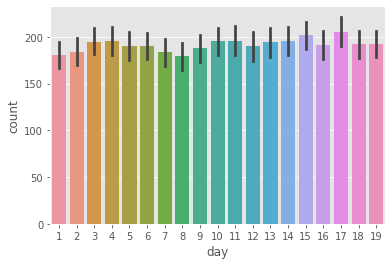

In [20]:
sns.barplot(data = train, x = 'day', y = 'count')

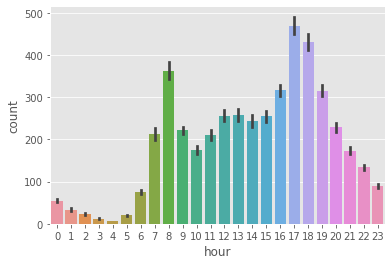

In [21]:
sns.barplot(data = train, x = 'hour', y = 'count')

In [22]:
train['dayofweek'] = datetime.dt.dayofweek
train['dayofweek'].head()

0    5
1    5
2    5
3    5
4    5
Name: dayofweek, dtype: int64

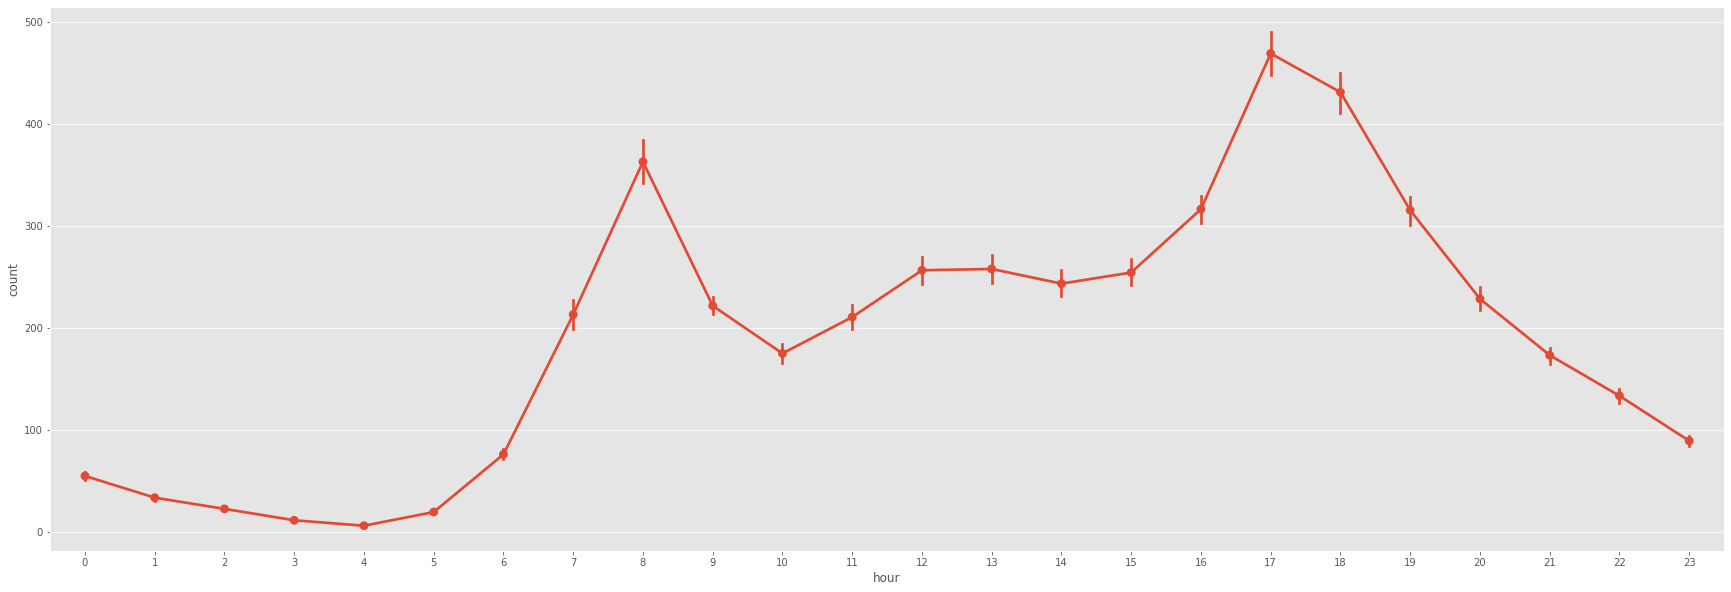

In [23]:
plt.figure(figsize = (30,10))
sns.pointplot(data = train, x = 'hour', y = 'count')

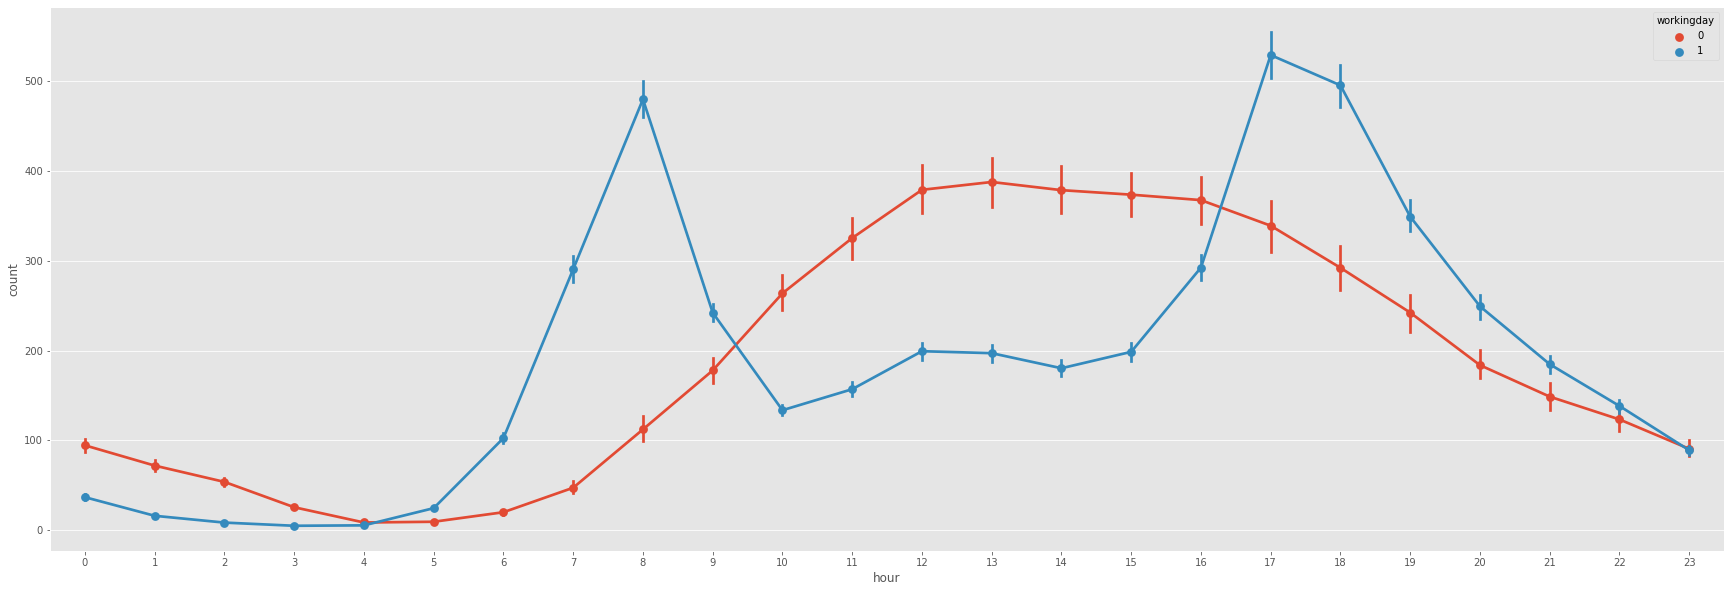

In [24]:
plt.figure(figsize = (30,10))
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'workingday')

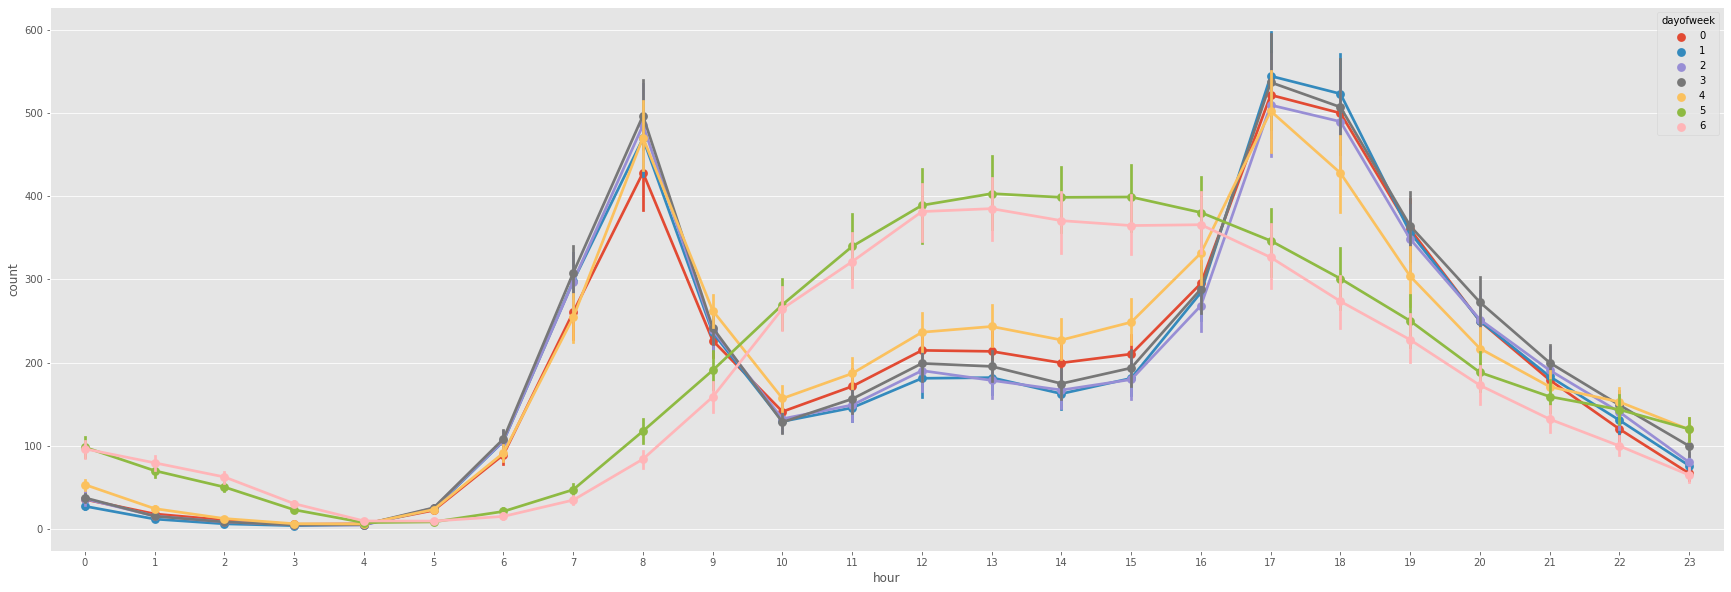

In [25]:
plt.figure(figsize = (30,10))
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'dayofweek')

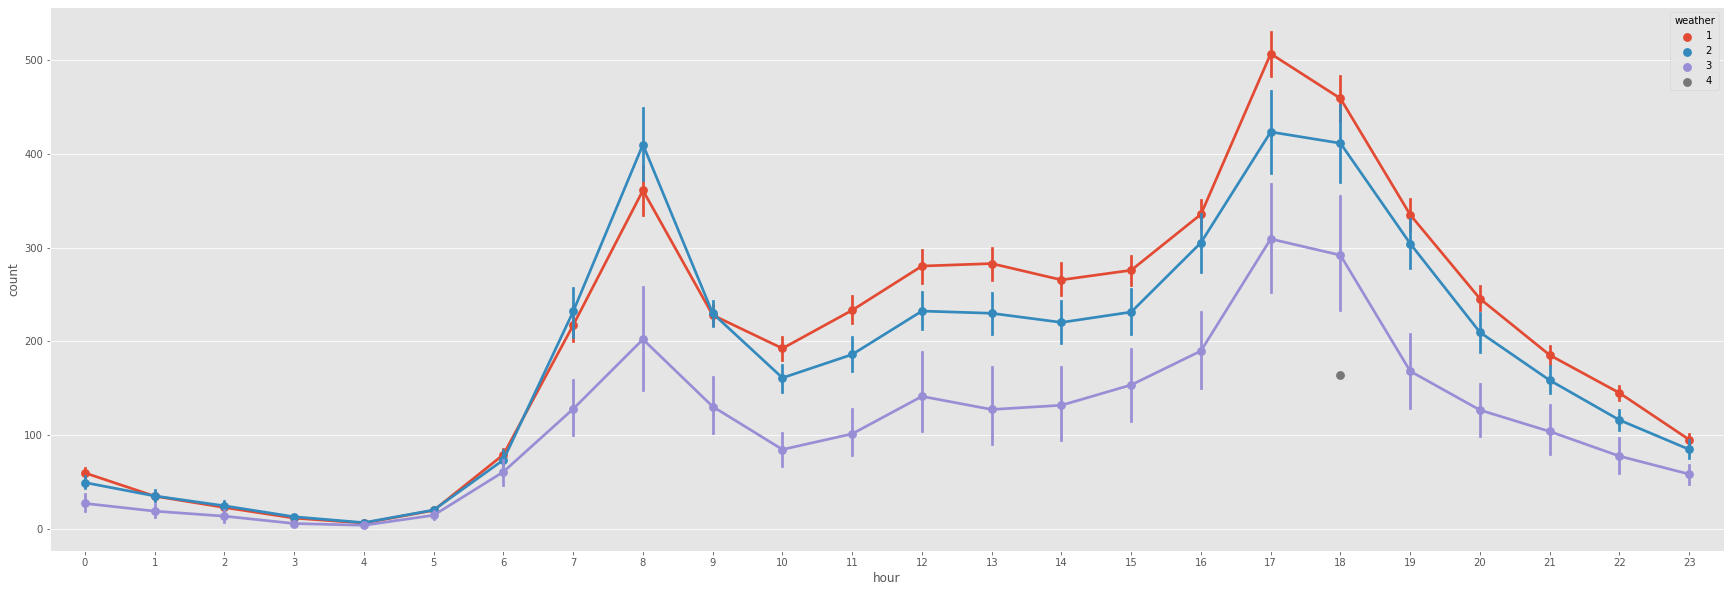

In [26]:
plt.figure(figsize = (30,10))
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'weather')

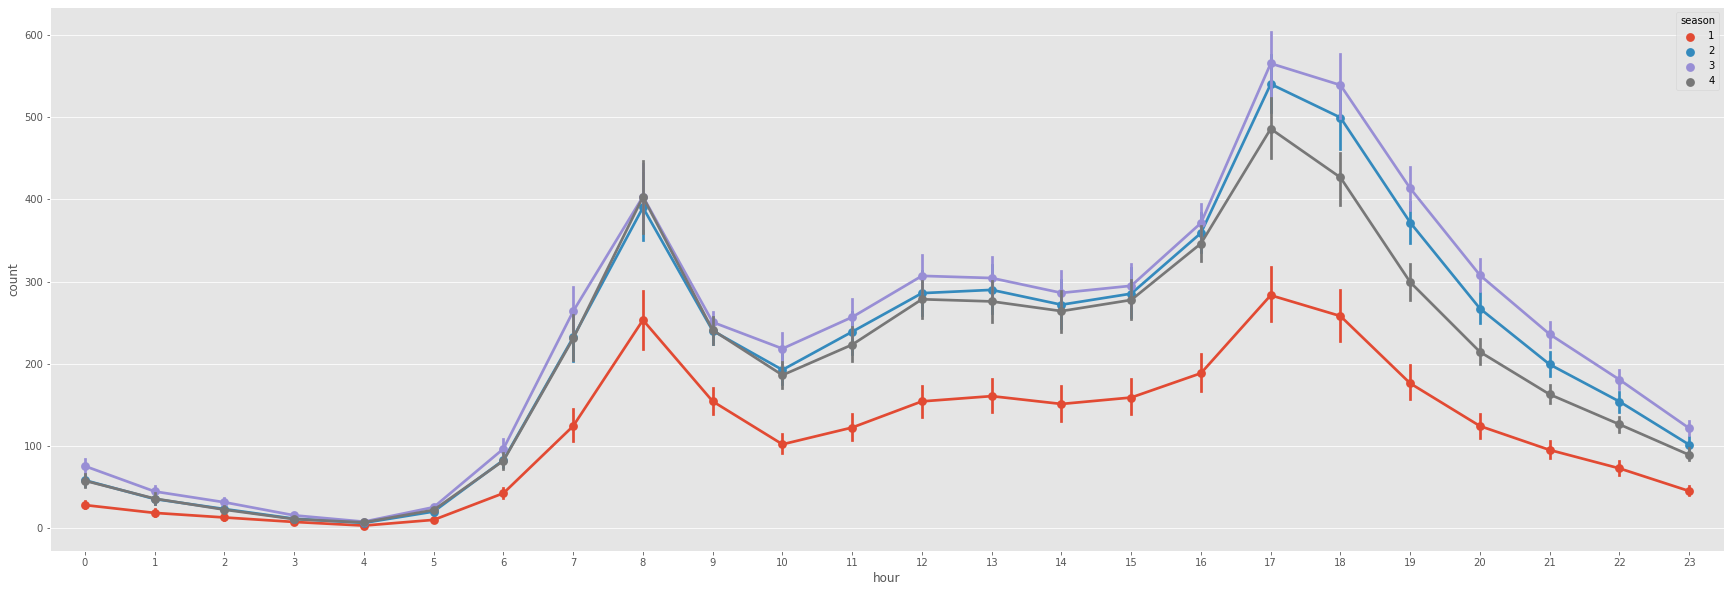

In [27]:
plt.figure(figsize = (30,10))
sns.pointplot(data = train, x = 'hour', y = 'count', hue = 'season')

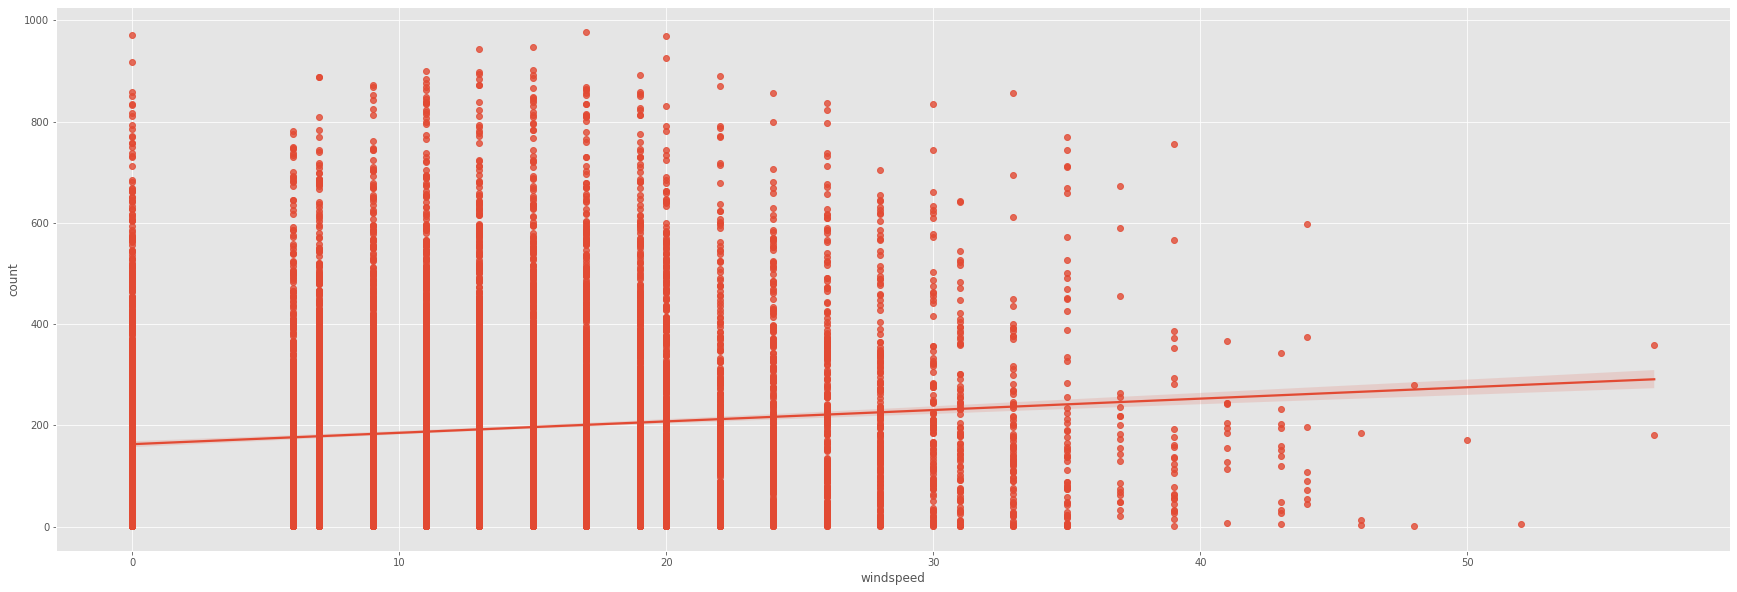

In [28]:
plt.figure(figsize = (30,10))
sns.regplot(x = 'windspeed', y = 'count', data = train)

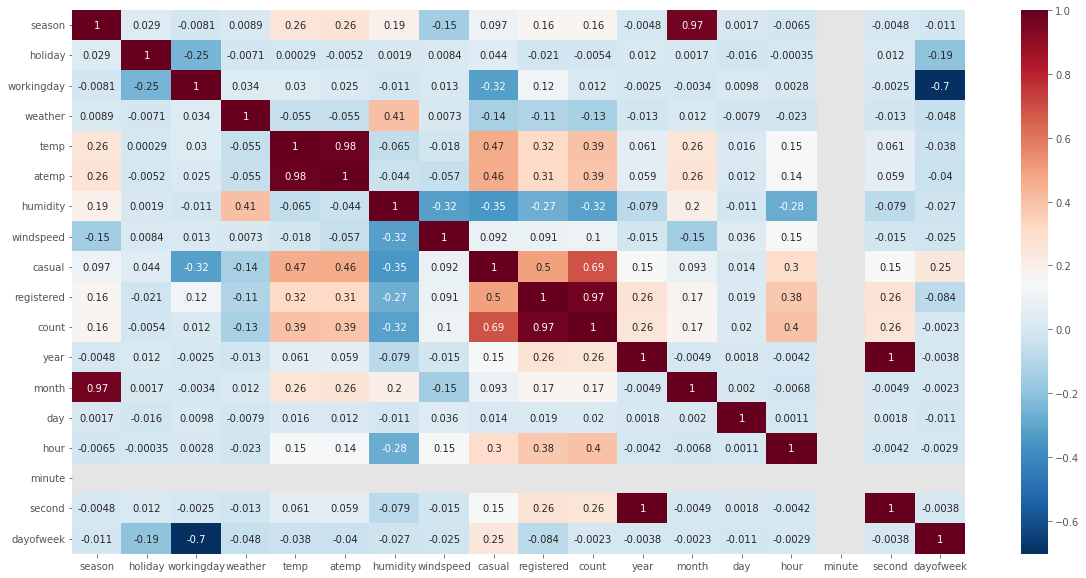

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(train.corr(), annot = True, cmap = 'RdBu_r')

In [30]:
y = train['count']
y.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [31]:
X = train.copy()
X.pop('count')
X.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,2011,1,1,0,0,2011,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,2011,1,1,1,0,2011,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,2011,1,1,2,0,2011,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,2011,1,1,3,0,2011,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,2011,1,1,4,0,2011,5


In [32]:
X.pop('datetime')

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [33]:
X.pop('registered')

0         13
1         32
2         27
3         10
4          1
        ... 
10881    329
10882    231
10883    164
10884    117
10885     84
Name: registered, Length: 10886, dtype: int64

In [34]:
X.pop('casual')

0         3
1         8
2         5
3         3
4         0
         ..
10881     7
10882    10
10883     4
10884    12
10885     4
Name: casual, Length: 10886, dtype: int64

In [35]:
X.pop('day')

0         1
1         1
2         1
3         1
4         1
         ..
10881    19
10882    19
10883    19
10884    19
10885    19
Name: day, Length: 10886, dtype: int64

In [36]:
X.pop('minute')

0        0
1        0
2        0
3        0
4        0
        ..
10881    0
10882    0
10883    0
10884    0
10885    0
Name: minute, Length: 10886, dtype: int64

In [37]:
X.pop('second')

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10881    2012
10882    2012
10883    2012
10884    2012
10885    2012
Name: second, Length: 10886, dtype: int64

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =156)

In [39]:
rf_model = RandomForestRegressor(
    random_state = 0
)

In [40]:
rf_model

RandomForestRegressor(random_state=0)

In [41]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [42]:
pred = rf_model.predict(X_test)

In [43]:
pred

array([ 33.95, 547.64,  89.25, ..., 318.19, 143.25, 330.48])

In [44]:
print("MSE: ", mean_squared_error(y_test, pred))

MSE:  1508.207127363649


In [45]:
q1 = np.percentile(train['count'], 25)
q1

42.0

In [46]:
q3 = np.percentile(train['count'], 75)
q3

284.0

In [47]:
IQR = q3 - q1
IQR

242.0

In [48]:
trainWithoutOutliers = train[(train['count'] >= (q1 - 1.5 * IQR)) & (train['count'] <= (q3 + 1.5*IQR))]

In [49]:
trainWithoutOutliers

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,2011,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,2011,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,2011,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,2011,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,2011,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,2012,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,2012,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,2012,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,2012,2


In [50]:
trainOutliers = train[(train['count'] < (q1 - 1.5 * IQR)) | (train['count'] > (q3 + 1.5*IQR))]

In [51]:
trainOutliers

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
6611,2012-03-12 18:00:00,1,0,1,2,24.60,31.060,43,12.9980,89,623,712,2012,3,12,18,0,2012,0
6634,2012-03-13 17:00:00,1,0,1,1,28.70,31.820,37,7.0015,62,614,676,2012,3,13,17,0,2012,1
6635,2012-03-13 18:00:00,1,0,1,1,28.70,31.820,34,19.9995,96,638,734,2012,3,13,18,0,2012,1
6649,2012-03-14 08:00:00,1,0,1,1,18.04,21.970,82,0.0000,34,628,662,2012,3,14,8,0,2012,2
6658,2012-03-14 17:00:00,1,0,1,1,28.70,31.820,28,6.0032,140,642,782,2012,3,14,17,0,2012,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2012-12-11 08:00:00,4,0,1,2,13.94,15.150,61,19.9995,16,708,724,2012,12,11,8,0,2012,1
10702,2012-12-12 08:00:00,4,0,1,2,10.66,12.880,65,11.0014,18,670,688,2012,12,12,8,0,2012,2
10726,2012-12-13 08:00:00,4,0,1,1,9.84,11.365,60,12.9980,24,655,679,2012,12,13,8,0,2012,3
10846,2012-12-18 08:00:00,4,0,1,1,15.58,19.695,94,0.0000,10,652,662,2012,12,18,8,0,2012,1


In [52]:
train = trainWithoutOutliers.copy()

In [53]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,2011,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,2011,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,2011,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,2011,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,2011,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,2012,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,2012,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,2012,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,2012,2


In [54]:
train.iloc[6610:6615, : ]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
6610,2012-03-12 17:00:00,1,0,1,2,25.42,31.060,38,27.9993,87,557,644,2012,3,12,17,0,2012,0
6612,2012-03-12 19:00:00,1,0,1,2,22.96,26.515,49,15.0013,67,379,446,2012,3,12,19,0,2012,0
6613,2012-03-12 20:00:00,1,0,1,2,22.96,26.515,49,15.0013,49,237,286,2012,3,12,20,0,2012,0
6614,2012-03-12 21:00:00,1,0,1,2,22.14,25.760,56,15.0013,22,183,205,2012,3,12,21,0,2012,0
6615,2012-03-12 22:00:00,1,0,1,2,22.96,26.515,56,15.0013,17,116,133,2012,3,12,22,0,2012,0


In [55]:
train.index = range(len(train))

In [56]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,2011,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,2011,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,2011,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,2011,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,2011,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,2012,2
10582,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,2012,2
10583,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,2012,2
10584,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,2012,2


In [57]:
train.iloc[6610:6615, : ]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
6610,2012-03-12 17:00:00,1,0,1,2,25.42,31.060,38,27.9993,87,557,644,2012,3,12,17,0,2012,0
6611,2012-03-12 19:00:00,1,0,1,2,22.96,26.515,49,15.0013,67,379,446,2012,3,12,19,0,2012,0
6612,2012-03-12 20:00:00,1,0,1,2,22.96,26.515,49,15.0013,49,237,286,2012,3,12,20,0,2012,0
6613,2012-03-12 21:00:00,1,0,1,2,22.14,25.760,56,15.0013,22,183,205,2012,3,12,21,0,2012,0
6614,2012-03-12 22:00:00,1,0,1,2,22.96,26.515,56,15.0013,17,116,133,2012,3,12,22,0,2012,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


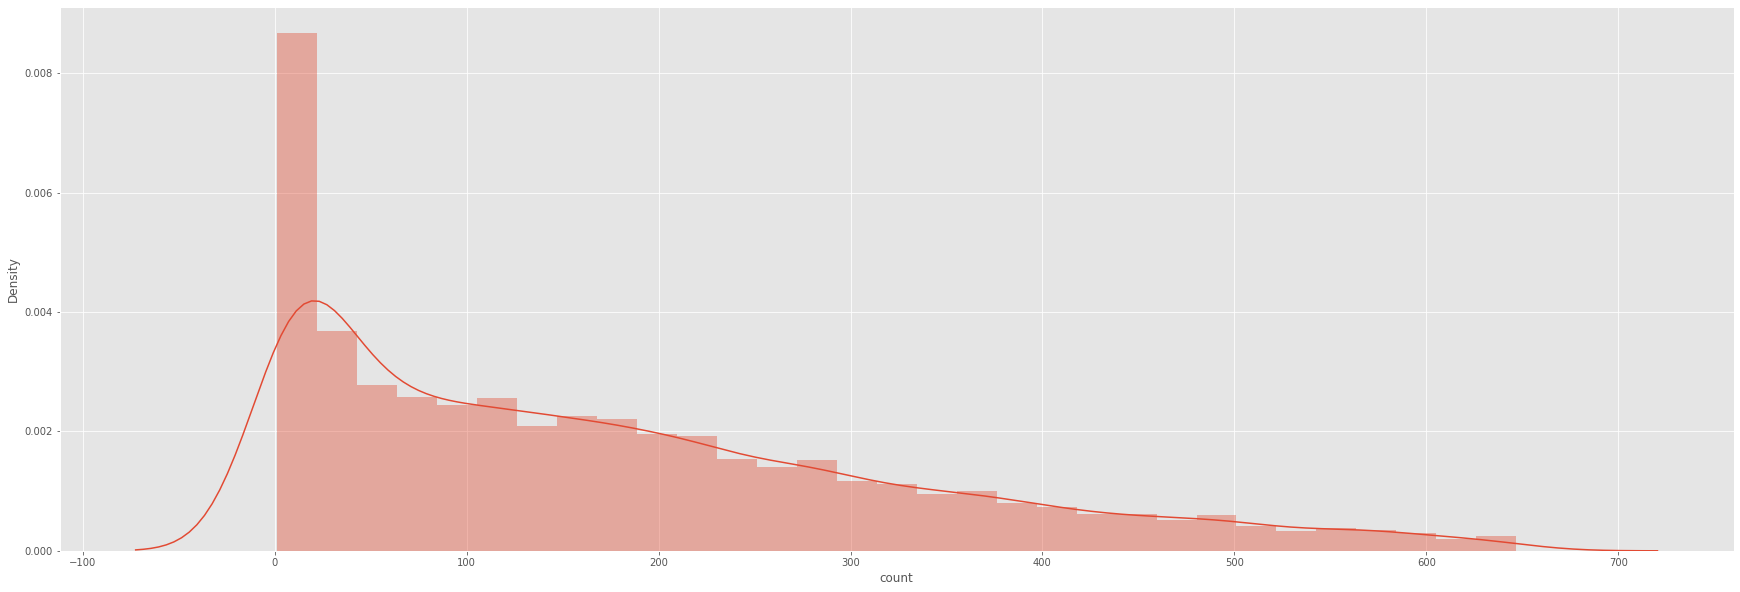

In [58]:
plt.figure(figsize = (30,10))
sns.distplot(train['count'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


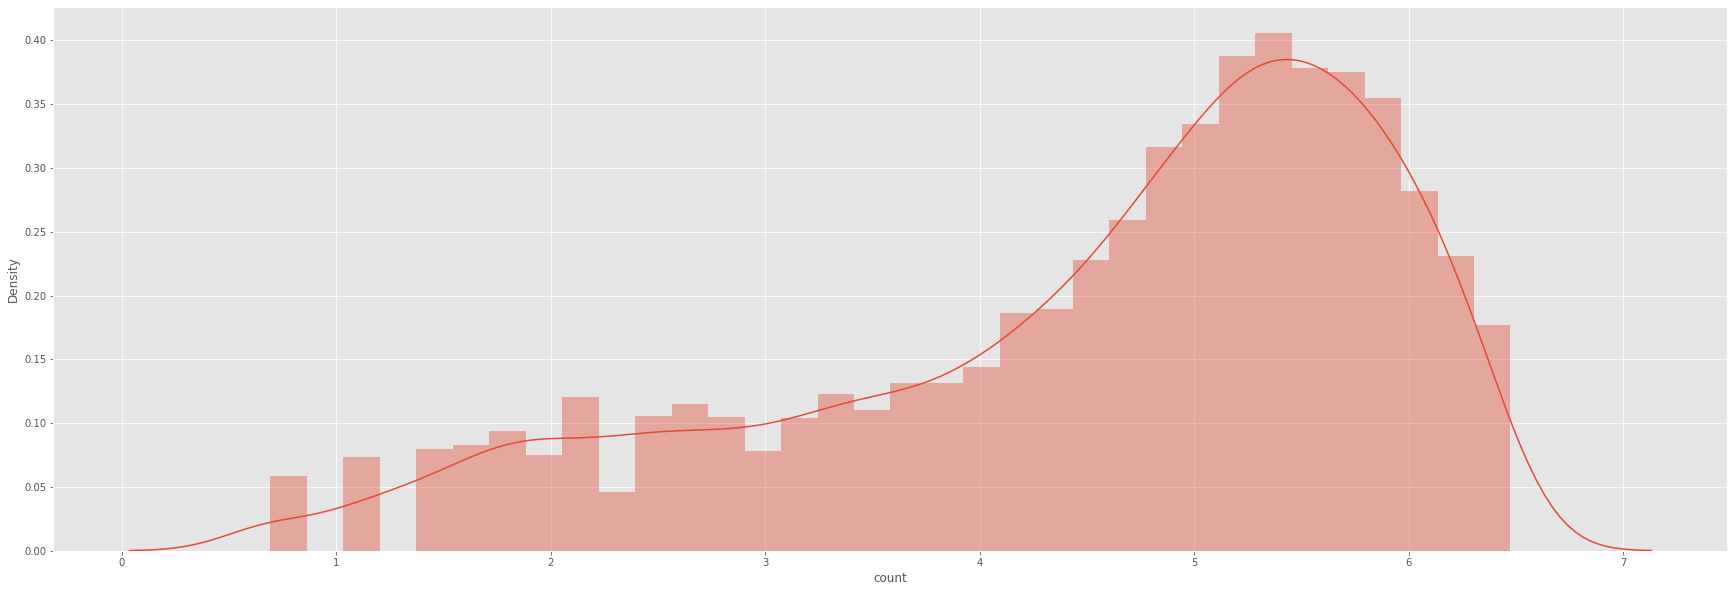

In [59]:
train['count'] = np.log1p(train['count'])
plt.figure(figsize = (30,10))
sns.distplot(train['count'])

In [60]:
y = train['count']
y.head()

0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: count, dtype: float64

In [61]:
X = train.copy()
X.pop('count')
X.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,2011,1,1,0,0,2011,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,2011,1,1,1,0,2011,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,2011,1,1,2,0,2011,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,2011,1,1,3,0,2011,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,2011,1,1,4,0,2011,5


In [62]:
X.pop('datetime')

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10581   2012-12-19 19:00:00
10582   2012-12-19 20:00:00
10583   2012-12-19 21:00:00
10584   2012-12-19 22:00:00
10585   2012-12-19 23:00:00
Name: datetime, Length: 10586, dtype: datetime64[ns]

In [63]:
X.pop('registered')

0         13
1         32
2         27
3         10
4          1
        ... 
10581    329
10582    231
10583    164
10584    117
10585     84
Name: registered, Length: 10586, dtype: int64

In [64]:
X.pop('casual')

0         3
1         8
2         5
3         3
4         0
         ..
10581     7
10582    10
10583     4
10584    12
10585     4
Name: casual, Length: 10586, dtype: int64

In [65]:
X.pop('day')

0         1
1         1
2         1
3         1
4         1
         ..
10581    19
10582    19
10583    19
10584    19
10585    19
Name: day, Length: 10586, dtype: int64

In [66]:
X.pop('minute')

0        0
1        0
2        0
3        0
4        0
        ..
10581    0
10582    0
10583    0
10584    0
10585    0
Name: minute, Length: 10586, dtype: int64

In [67]:
X.pop('second')

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10581    2012
10582    2012
10583    2012
10584    2012
10585    2012
Name: second, Length: 10586, dtype: int64

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156)

In [69]:
rf_model = RandomForestRegressor(
    random_state = 0
)

In [70]:
rf_model

RandomForestRegressor(random_state=0)

In [71]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [72]:
pred = rf_model.predict(X_test)

In [73]:
pred

array([5.22521988, 6.35009589, 5.02216584, ..., 4.61489246, 4.26156294,
       4.92807568])

In [74]:
print("MSE: ", mean_squared_error(y_test, pred))

MSE:  0.09544071772145922


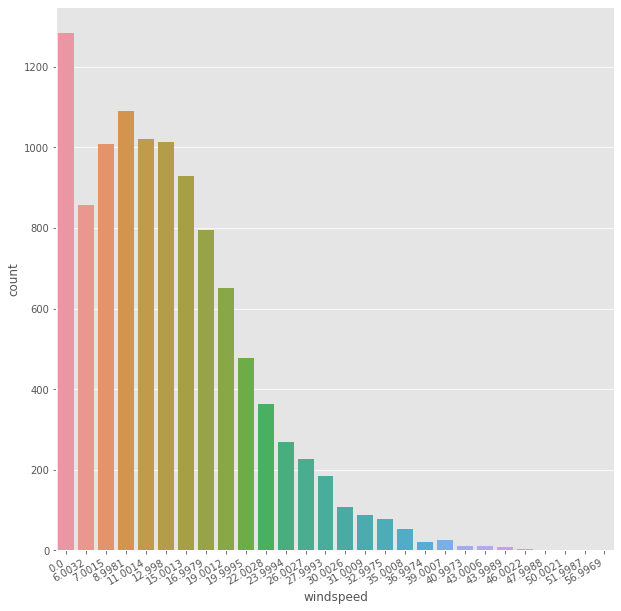

In [75]:
plt.figure(figsize = (10,10))
plt.xticks(rotation = 30, ha = 'right')
sns.countplot(data = train, x = 'windspeed')

In [76]:
trainWind0 = train[train['windspeed'] == 0]

In [77]:
trainWind0

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,2.833213,2011,1,1,0,0,2011,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,3.713572,2011,1,1,1,0,2011,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,3.496508,2011,1,1,2,0,2011,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,2.639057,2011,1,1,3,0,2011,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,0.693147,2011,1,1,4,0,2011,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10525,2012-12-17 09:00:00,4,0,1,2,16.40,20.455,87,0.0,11,271,5.645447,2012,12,17,9,0,2012,0
10528,2012-12-17 12:00:00,4,0,1,2,16.40,20.455,87,0.0,21,211,5.451038,2012,12,17,12,0,2012,0
10531,2012-12-17 15:00:00,4,0,1,2,17.22,21.210,88,0.0,15,196,5.356586,2012,12,17,15,0,2012,0
10561,2012-12-18 22:00:00,4,0,1,1,13.94,16.665,49,0.0,5,127,4.890349,2012,12,18,22,0,2012,1


In [78]:
trainWindNot0 = train[train['windspeed'] != 0]

In [79]:
trainWindNot0

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,0.693147,2011,1,1,5,0,2011,5
10,2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,24,3.610918,2011,1,1,10,0,2011,5
11,2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26,30,4.043051,2011,1,1,11,0,2011,5
12,2011-01-01 12:00:00,1,0,0,1,17.22,21.210,77,19.0012,29,55,4.442651,2011,1,1,12,0,2011,5
13,2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47,47,4.553877,2011,1,1,13,0,2011,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,5.820083,2012,12,19,19,0,2012,2
10582,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,5.488938,2012,12,19,20,0,2012,2
10583,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,5.129899,2012,12,19,21,0,2012,2
10584,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,4.867534,2012,12,19,22,0,2012,2


In [80]:
trainWindNot0['windspeed'].mean()

14.541892215891192

In [81]:
X = train.copy()

In [82]:
X[X['windspeed'] == 0]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,2.833213,2011,1,1,0,0,2011,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,3.713572,2011,1,1,1,0,2011,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,3.496508,2011,1,1,2,0,2011,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,2.639057,2011,1,1,3,0,2011,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,0.693147,2011,1,1,4,0,2011,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10525,2012-12-17 09:00:00,4,0,1,2,16.40,20.455,87,0.0,11,271,5.645447,2012,12,17,9,0,2012,0
10528,2012-12-17 12:00:00,4,0,1,2,16.40,20.455,87,0.0,21,211,5.451038,2012,12,17,12,0,2012,0
10531,2012-12-17 15:00:00,4,0,1,2,17.22,21.210,88,0.0,15,196,5.356586,2012,12,17,15,0,2012,0
10561,2012-12-18 22:00:00,4,0,1,1,13.94,16.665,49,0.0,5,127,4.890349,2012,12,18,22,0,2012,1


In [83]:
X.loc[X['windspeed'] == 0, 'windspeed'] = trainWindNot0['windspeed'].mean()

In [84]:
X

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,14.541892,3,13,2.833213,2011,1,1,0,0,2011,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,14.541892,8,32,3.713572,2011,1,1,1,0,2011,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,14.541892,5,27,3.496508,2011,1,1,2,0,2011,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,14.541892,3,10,2.639057,2011,1,1,3,0,2011,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,14.541892,0,1,0.693147,2011,1,1,4,0,2011,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.002700,7,329,5.820083,2012,12,19,19,0,2012,2
10582,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.001300,10,231,5.488938,2012,12,19,20,0,2012,2
10583,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.001300,4,164,5.129899,2012,12,19,21,0,2012,2
10584,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.003200,12,117,4.867534,2012,12,19,22,0,2012,2


In [85]:
train['peak'] = 0

In [86]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek,peak
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,2.833213,2011,1,1,0,0,2011,5,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,3.713572,2011,1,1,1,0,2011,5,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,3.496508,2011,1,1,2,0,2011,5,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,2.639057,2011,1,1,3,0,2011,5,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,0.693147,2011,1,1,4,0,2011,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,5.820083,2012,12,19,19,0,2012,2,0
10582,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,5.488938,2012,12,19,20,0,2012,2,0
10583,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,5.129899,2012,12,19,21,0,2012,2,0
10584,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,4.867534,2012,12,19,22,0,2012,2,0


In [87]:
for index in range(len(train)):
  workingday = train.loc[index, "workingday"]
  hour = train.loc[index,"hour"]
  print("inddex", index)
  print("workingday:", workingday)
  print("hour", hour)
  print("="*100)
  if workingday == 1:
    if hour == 8 or (17 <= hour <= 18):
      train.loc[index, "peak"] = 1
  else:
    if 10 <= hour <= 19:
      train.loc[index, "peak"] = 1

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
inddex 9336
workingday: 1
hour 4
inddex 9337
workingday: 1
hour 5
inddex 9338
workingday: 1
hour 6
inddex 9339
workingday: 1
hour 7
inddex 9340
workingday: 1
hour 9
inddex 9341
workingday: 1
hour 10
inddex 9342
workingday: 1
hour 11
inddex 9343
workingday: 1
hour 12
inddex 9344
workingday: 1
hour 13
inddex 9345
workingday: 1
hour 14
inddex 9346
workingday: 1
hour 15
inddex 9347
workingday: 1
hour 16
inddex 9348
workingday: 1
hour 19
inddex 9349
workingday: 1
hour 20
inddex 9350
workingday: 1
hour 21
inddex 9351
workingday: 1
hour 22
inddex 9352
workingday: 1
hour 23
inddex 9353
workingday: 1
hour 0
inddex 9354
workingday: 1
hour 1
inddex 9355
workingday: 1
hour 2
inddex 9356
workingday: 1
hour 3
inddex 9357
workingday: 1
hour 4
inddex 9358
workingday: 1
hour 5
inddex 9359
workingday: 1
hour 6
inddex 9360
workingday: 1
hour 7
inddex 9361
workingday: 1
hour 9
inddex 9362
workingday: 1
hour 10
inddex 9363
workingday: 1
hour 11
inddex 9364
workingday: 1


In [88]:
train[train['peak'] == 1]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek,peak
10,2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12,24,3.610918,2011,1,1,10,0,2011,5,1
11,2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26,30,4.043051,2011,1,1,11,0,2011,5,1
12,2011-01-01 12:00:00,1,0,0,1,17.22,21.210,77,19.0012,29,55,4.442651,2011,1,1,12,0,2011,5,1
13,2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47,47,4.553877,2011,1,1,13,0,2011,5,1
14,2011-01-01 14:00:00,1,0,0,2,18.86,22.725,72,19.0012,35,71,4.672829,2011,1,1,14,0,2011,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10534,2012-12-17 18:00:00,4,0,1,2,16.40,20.455,94,6.0032,14,493,6.230481,2012,12,17,18,0,2012,0,1
10556,2012-12-18 17:00:00,4,0,1,1,16.40,20.455,47,30.0026,39,533,6.350886,2012,12,18,17,0,2012,1,1
10557,2012-12-18 18:00:00,4,0,1,1,15.58,19.695,46,22.0028,13,512,6.265301,2012,12,18,18,0,2012,1,1
10579,2012-12-19 17:00:00,4,0,1,1,16.40,20.455,50,26.0027,26,536,6.333280,2012,12,19,17,0,2012,2,1


In [89]:
train['ideal'] = 0

In [90]:
for index in range(len(train)):
  if (train.loc[index, "temp"] > 27) & (train.loc[index, "windspeed"] < 30):
    train.loc[index, "ideal"] = 1

In [91]:
train[train['ideal'] == 1]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek,peak,ideal
843,2011-02-18 14:00:00,1,0,1,1,27.06,31.060,36,19.9995,73,118,5.257495,2011,2,18,14,0,2011,4,0,1
844,2011-02-18 15:00:00,1,0,1,1,27.06,31.060,36,22.0028,55,117,5.153292,2011,2,18,15,0,2011,4,0,1
845,2011-02-18 16:00:00,1,0,1,1,27.06,31.060,36,19.0012,68,164,5.451038,2011,2,18,16,0,2011,4,0,1
846,2011-02-18 17:00:00,1,0,1,1,27.06,31.060,34,23.9994,52,275,5.793014,2011,2,18,17,0,2011,4,1,1
1289,2011-03-18 14:00:00,1,0,1,1,27.06,31.060,39,16.9979,71,103,5.164786,2011,3,18,14,0,2011,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9388,2012-10-05 15:00:00,4,0,1,1,29.52,32.575,39,16.9979,150,320,6.154858,2012,10,5,15,0,2012,4,0,1
9389,2012-10-05 16:00:00,4,0,1,1,29.52,32.575,37,0.0000,153,481,6.453625,2012,10,5,16,0,2012,4,0,1
9585,2012-10-14 14:00:00,4,0,0,1,27.06,31.060,39,27.9993,249,368,6.426488,2012,10,14,14,0,2012,6,1,1
9586,2012-10-14 15:00:00,4,0,0,1,27.06,31.060,39,27.9993,213,355,6.343880,2012,10,14,15,0,2012,6,1,1


In [92]:
train['sticky'] = 0

In [93]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek,peak,ideal,sticky
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,2.833213,2011,1,1,0,0,2011,5,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,3.713572,2011,1,1,1,0,2011,5,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,3.496508,2011,1,1,2,0,2011,5,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,2.639057,2011,1,1,3,0,2011,5,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,0.693147,2011,1,1,4,0,2011,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,5.820083,2012,12,19,19,0,2012,2,0,0,0
10582,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,5.488938,2012,12,19,20,0,2012,2,0,0,0
10583,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,5.129899,2012,12,19,21,0,2012,2,0,0,0
10584,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,4.867534,2012,12,19,22,0,2012,2,0,0,0


In [94]:
for index in range(len(train)):
  if (train.loc[index, "humidity"] >= 60) & (train.loc[index, "workingday"] == 1):
    train.loc[index, "sticky"] = 1

In [95]:
train[train['sticky'] == 1]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek,peak,ideal,sticky
66,2011-01-03 21:00:00,1,0,1,1,7.38,9.850,64,8.9981,3,49,3.970292,2011,1,3,21,0,2011,0,0,0,1
67,2011-01-03 22:00:00,1,0,1,1,5.74,7.575,69,8.9981,0,20,3.044522,2011,1,3,22,0,2011,0,0,0,1
71,2011-01-04 02:00:00,1,0,1,1,5.74,7.575,63,8.9981,0,1,0.693147,2011,1,4,2,0,2011,1,0,0,1
72,2011-01-04 04:00:00,1,0,1,1,5.74,9.090,63,6.0032,0,2,1.098612,2011,1,4,4,0,2011,1,0,0,1
73,2011-01-04 05:00:00,1,0,1,1,4.92,7.575,68,7.0015,0,4,1.609438,2011,1,4,5,0,2011,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10571,2012-12-19 09:00:00,4,0,1,1,11.48,14.395,75,7.0015,8,309,5.762051,2012,12,19,9,0,2012,2,0,0,1
10572,2012-12-19 10:00:00,4,0,1,1,13.12,16.665,70,7.0015,17,147,5.105945,2012,12,19,10,0,2012,2,0,0,1
10583,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,5.129899,2012,12,19,21,0,2012,2,0,0,1
10584,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,4.867534,2012,12,19,22,0,2012,2,0,0,1


In [96]:
y = train['count']
y

0        2.833213
1        3.713572
2        3.496508
3        2.639057
4        0.693147
           ...   
10581    5.820083
10582    5.488938
10583    5.129899
10584    4.867534
10585    4.488636
Name: count, Length: 10586, dtype: float64

In [97]:
X = train.copy()
X.pop('count')

0        2.833213
1        3.713572
2        3.496508
3        2.639057
4        0.693147
           ...   
10581    5.820083
10582    5.488938
10583    5.129899
10584    4.867534
10585    4.488636
Name: count, Length: 10586, dtype: float64

In [98]:
X

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,day,hour,minute,second,dayofweek,peak,ideal,sticky
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,2011,1,1,0,0,2011,5,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,2011,1,1,1,0,2011,5,0,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,2011,1,1,2,0,2011,5,0,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,2011,1,1,3,0,2011,5,0,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,2011,1,1,4,0,2011,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10581,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,2012,12,19,19,0,2012,2,0,0,0
10582,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,2012,12,19,20,0,2012,2,0,0,0
10583,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,2012,12,19,21,0,2012,2,0,0,1
10584,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,2012,12,19,22,0,2012,2,0,0,1


In [99]:
X.pop('datetime')

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10581   2012-12-19 19:00:00
10582   2012-12-19 20:00:00
10583   2012-12-19 21:00:00
10584   2012-12-19 22:00:00
10585   2012-12-19 23:00:00
Name: datetime, Length: 10586, dtype: datetime64[ns]

In [100]:
X.pop('registered')
X.pop('casual')
X.pop('day')
X.pop('minute')
X.pop('second')

0        2011
1        2011
2        2011
3        2011
4        2011
         ... 
10581    2012
10582    2012
10583    2012
10584    2012
10585    2012
Name: second, Length: 10586, dtype: int64

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156)

In [102]:
rf_model = RandomForestRegressor(
    random_state = 0
)

In [103]:
rf_model

RandomForestRegressor(random_state=0)

In [104]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [105]:
pred = rf_model.predict(X_test)

In [106]:
pred

array([5.47889344, 6.36847665, 4.89643866, ..., 4.59228927, 4.27344288,
       4.91916632])

In [107]:
print("MSE: ", mean_squared_error(y_test, pred))

MSE:  0.09146446184999109


In [108]:
rf_model.estimators_[0]

DecisionTreeRegressor(max_features='auto', random_state=209652396)

In [109]:
dt_dot_data = tree.export_graphviz(
    rf_model.estimators_[0],
    feature_names = X.columns,
    special_characters = True,
    filled = True,
    rounded = True
)

In [111]:
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

In [112]:
dt_graph

In [113]:
dt_graph.write_pdf("bike01.pdf")

True

In [114]:
model_xgb = XGBRegressor(
    n_estimators = 150,
    max_depth = 5,
    random_state = 0,
    min_child_weight = 7,
    learning_rate = 0.1
)

In [115]:
model_xgb.fit(X_train, y_train)

[05:12:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(max_depth=5, min_child_weight=7, n_estimators=150)

In [116]:
pred = model_xgb.predict(X_test)

In [117]:
pred

array([5.286624 , 6.357105 , 4.9178886, ..., 4.651814 , 4.3455276,
       4.9616613], dtype=float32)

In [118]:
print("MSE: ", mean_squared_error(pred, y_test))

MSE:  0.08000821933924894
